In [2]:
train_df = pd.read_csv('store_data/train_df_save4.csv')
test_df  = pd.read_csv('store_data/test_df_save4.csv')
sub      = pd.read_csv('sample_submission_24jSKY6.csv')
info_df  = pd.read_excel('train_aox2Jxw/Data Dictionary.xlsx')

train_df.shape, test_df.shape

((224607, 216), (112392, 215))

In [124]:
investigate = pd.read_csv('store_data/train_df_save4.csv')
investigate.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Employment.Type', 'State_ID',
       ...
       'pca_4', 'pca_5', 'tsne30_1', 'tsne30_2', 'tsne60_1', 'tsne60_2',
       'tsne90_1', 'tsne90_2', 'tsne120_1', 'tsne120_2'],
      dtype='object', length=216)

In [125]:
[col for col in investigate.columns]

['UniqueID',
 'disbursed_amount',
 'asset_cost',
 'ltv',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'Employment.Type',
 'State_ID',
 'Employee_code_ID',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'loan_default',
 'day_of_birth',
 'month_of_birth',
 'year_of_birth',
 'credit_hist_year',
 'credit_hist_month',
 'loan_tenure_year',
 'loan_tenure_month',
 'day_of_disbursal',
 'month_of_disbursal',
 'Bureau_desc',
 'bureau_score',
 'no_of_loans',
 'no_of_acc',
 'no_of_acc_overdue',
 'diff_of_acc',
 'negative_income',
 'income_status',
 'credit_history',
 'loan_tenure',
 'age_till_disbursal',
 'ltv_rou

In [3]:
shap_imp_cols = ['state1_mad','pincode2_mean','emp_code1_get_unique',
    'ltv_round_cat','bureau_score','emp_code1_sum','branch2_min', 'asset_cost', 'ltv',
    'manufac1_min','state1_mad','diff_of_acc','month_of_disbursal','day_of_disbursal',
    'no_of_acc_overdue','pincode2_mean']
train_df[shap_imp_cols].shape, test_df[shap_imp_cols].shape

((224607, 16), (112392, 16))

In [4]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,...,pca_4,pca_5,tsne30_1,tsne30_2,tsne60_1,tsne60_2,tsne90_1,tsne90_2,tsne120_1,tsne120_2
0,420825,50578,58400,89.55,67,22807,45,1441,0,6,...,1.215098,0.316675,-13.369084,-13.468479,9.756865,6.885396,-6.599228,-13.856510,12.791006,3.292685
1,537409,47145,65550,73.23,67,22807,45,1502,1,6,...,1.247593,-0.487597,-11.984010,-14.552938,7.462593,1.675558,-9.546783,-13.299788,9.042516,0.833470
2,417566,53278,61360,89.63,67,22807,45,1497,1,6,...,-0.485306,0.811246,12.665901,-12.466926,-7.298840,14.410624,12.964710,2.056213,-6.689389,-0.545910
3,624493,57513,66113,88.48,67,22807,45,1501,1,6,...,0.289948,-0.732252,-1.655971,-1.678139,1.791849,1.949082,-0.193142,-5.974420,2.999097,0.314507
4,539055,52378,60300,88.39,67,22807,45,1495,1,6,...,-0.846238,-0.384123,-0.511550,-0.447596,-6.301483,6.503486,13.990355,0.489619,-1.465677,4.505989


In [5]:
train_df1 = pd.read_csv('train_aox2Jxw/train.csv')
test_df1  = pd.read_csv('test_bqCt9Pv.csv')
train_df1.shape, test_df1.shape

((233154, 41), (112392, 40))

In [7]:
train_df = pd.merge(train_df, train_df1[['UniqueID','DisbursalDate']], on='UniqueID', how='left')
test_df = pd.merge(test_df, test_df1[['UniqueID','DisbursalDate']], on='UniqueID', how='left')

del train_df1, test_df1
gc.collect()
train_df.shape, test_df.shape

((224607, 217), (112392, 216))

In [8]:
train_df['cv_month'] = train_df.DisbursalDate.apply(lambda x: str(x).split('-')[1])
train_df['cv_date'] = train_df.DisbursalDate.apply(lambda x: str(x).split('-')[0])

test_df['cv_month'] = test_df.DisbursalDate.apply(lambda x: str(x).split('-')[1])
test_df['cv_date'] = test_df.DisbursalDate.apply(lambda x: str(x).split('-')[0])


In [9]:
train_df[['cv_month','cv_date']] = train_df[['cv_month','cv_date']].astype('int')
test_df[['cv_month','cv_date']] = test_df[['cv_month','cv_date']].astype('int')

In [69]:
# train_df[['month_of_disbursal','cv_month']].apply(lambda x: 1 if x[0] == x[1] else 0, axis=1).value_counts()

0    224607
dtype: int64

In [10]:
def run_cat_small(file_path, train_df, target, test_df, test_ids, sub, depth):
    
    splits = 4
    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from catboost import Pool, CatBoostClassifier

    features = train_df.columns
    random_seed = 2019
    
    model = CatBoostClassifier(loss_function         = "Logloss", 
                               eval_metric           = "AUC",
                               random_strength       = 1.5,
                               border_count          = 128,
                               scale_pos_weight      = 3.507,
                               depth                 = depth, 
                               early_stopping_rounds = 50,
                               random_seed           = 1337,
                               task_type             = 'CPU', 
    #                            subsample           = 0.7, 
                               iterations            = 10000, 
                               learning_rate         = 0.09,
                               thread_count          = 4
                              )


    n_split = splits
    
    valid_splits = int(train_df.shape[0]/splits)
    indexes = train_df[['cv_month','cv_date']].sort_values(
        by=['cv_month','cv_date'])
    
    train_index = indexes[:-valid_splits].index
    valid_index = indexes[-valid_splits:].index
    
    train_df.drop(['cv_month','cv_date'], axis=1, inplace=True)
    test_df.drop(['cv_month','cv_date'], axis=1, inplace=True)
    
    y_test_pred = 0

    idx = 0
    y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
    X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
    _train = Pool(X_train, label=y_train)#, cat_features=cate_features_index)
    _valid = Pool(X_valid, label=y_valid)#, cat_features=cate_features_index)

    fit_model = model.fit(_train, 
                          eval_set=_valid,
                          use_best_model=True,
                          verbose=100
                         )
    pred = fit_model.predict_proba(X_valid)[:,1]
    score = roc_auc_score(y_valid, pred)
    print( "  auc = ", score )
    print("="*60)

    y_test_pred = fit_model.predict_proba(test_df)[:,1]


    sub_df = pd.DataFrame({"ID_code":test_ids})
    sub_df["target"] = y_test_pred
    sub_df.columns = sub.columns


    sub_df.to_csv('submission/catboost_{}.csv'.format(file_path), index=None)

    cat_imp = pd.DataFrame(data=[fit_model.feature_names_, 
                                 list(fit_model.feature_importances_)]).T
    cat_imp.columns = ['feature','imp']
    cat_imp = cat_imp.sort_values(by='imp', ascending=False).head(50)
    plt.figure(figsize=(12,15))
    plt.barh(cat_imp.feature, cat_imp.imp)
    plt.show()
    
    return score

In [11]:
intersting_cols = ['manufacturer_id','Employment.Type','State_ID','Aadhar_flag','PAN_flag','VoterID_flag',
'Driving_flag','Passport_flag','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS','SEC.OVERDUE.ACCTS',
'SEC.INSTAL.AMT','NEW.ACCTS.IN.LAST.SIX.MONTHS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
'month_of_birth','credit_hist_year','credit_hist_month','loan_tenure_year','loan_tenure_month',
'day_of_disbursal','month_of_disbursal','Bureau_desc','no_of_loans','no_of_acc','no_of_acc_overdue',
'diff_of_acc','negative_income','income_status','credit_history','loan_tenure','ltv_round_cat',
'no_of_inquiry','state1_max','state1_count','manufac1_max','manufac2_count']

In [12]:
most_imp = ['UniqueID','ltv', 'disbursed_amount', 'year_of_birth','no_of_acc_overdue','month_of_disbursal',
 'Employee_code_ID','Current_pincode_ID','State_ID', 'day_of_disbursal','day_of_birth',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS','no_of_inquiry','PRI.SANCTIONED.AMOUNT','credit_hist_year',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','emp_code1_sum','branch1_max','PRIMARY.INSTAL.AMT',
 'manufacturer_id','manufac1_max', 'cv_month','cv_date']
target = train_df.loan_default
train_df = train_df[list(set(intersting_cols + most_imp + shap_imp_cols))]
test_df  = test_df[list(set(intersting_cols + most_imp + shap_imp_cols))]
train_df.shape, test_df.shape, target.shape

((224607, 56), (112392, 56), (224607,))

In [14]:
test_ids = test_df.UniqueID

0:	test: 0.5896555	best: 0.5896555 (0)	total: 123ms	remaining: 20m 26s
100:	test: 0.6430603	best: 0.6430603 (100)	total: 5.58s	remaining: 9m 7s
200:	test: 0.6499370	best: 0.6499720 (199)	total: 10.9s	remaining: 8m 53s
300:	test: 0.6532084	best: 0.6532084 (300)	total: 16.3s	remaining: 8m 45s
400:	test: 0.6545503	best: 0.6545503 (400)	total: 21.7s	remaining: 8m 40s
500:	test: 0.6556159	best: 0.6556159 (500)	total: 27.1s	remaining: 8m 33s
600:	test: 0.6563087	best: 0.6563087 (600)	total: 32.5s	remaining: 8m 28s
700:	test: 0.6564366	best: 0.6564426 (664)	total: 38.2s	remaining: 8m 26s
800:	test: 0.6569146	best: 0.6569146 (800)	total: 43.9s	remaining: 8m 24s
900:	test: 0.6573647	best: 0.6573647 (900)	total: 50s	remaining: 8m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.657596409
bestIteration = 949

Shrink model to first 950 iterations.
  auc =  0.6575964089709115


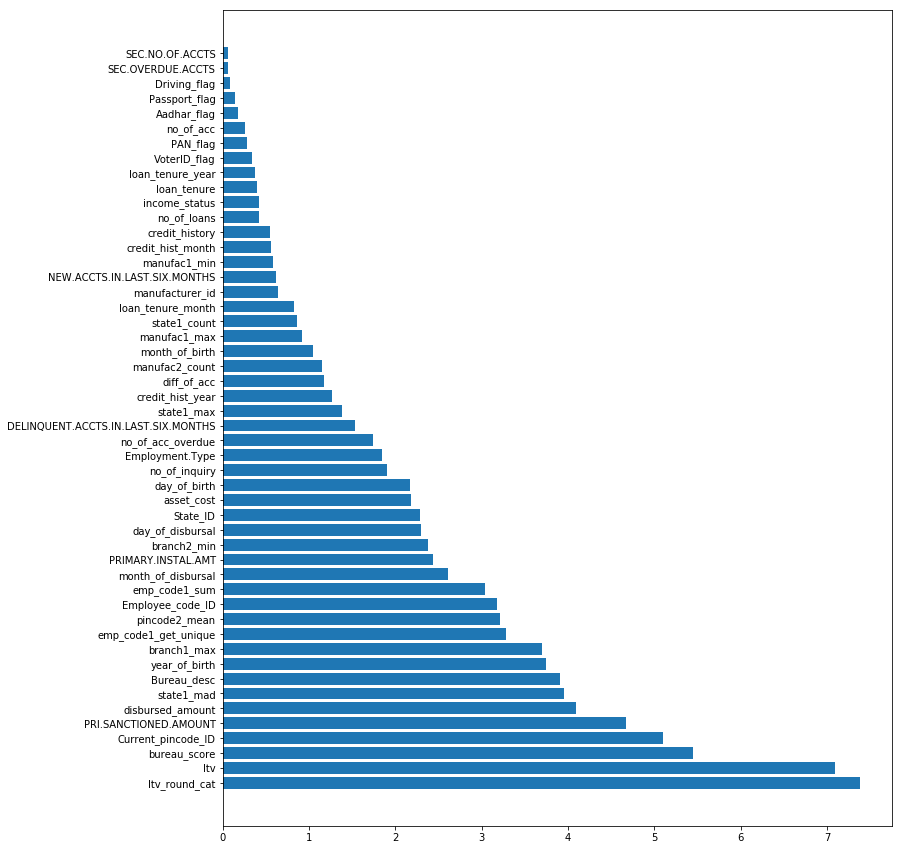

0.6575964089709115

In [16]:
run_cat_small('tuesday_cat1', train_df.drop('UniqueID', axis=1), 
              target, test_df.drop('UniqueID', axis=1), test_ids, sub, 4)


0:	test: 0.5916881	best: 0.5916881 (0)	total: 49.1ms	remaining: 8m 10s
100:	test: 0.6427668	best: 0.6427668 (100)	total: 5.9s	remaining: 9m 38s
200:	test: 0.6502411	best: 0.6502411 (200)	total: 11.7s	remaining: 9m 31s
300:	test: 0.6535282	best: 0.6535484 (295)	total: 18.3s	remaining: 9m 49s
400:	test: 0.6551117	best: 0.6551145 (399)	total: 24.5s	remaining: 9m 46s
500:	test: 0.6565435	best: 0.6565435 (500)	total: 30.2s	remaining: 9m 32s
600:	test: 0.6571935	best: 0.6572131 (598)	total: 35.9s	remaining: 9m 21s
700:	test: 0.6578163	best: 0.6578719 (689)	total: 41.7s	remaining: 9m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6580146411
bestIteration = 732

Shrink model to first 733 iterations.
  auc =  0.6580146411105373


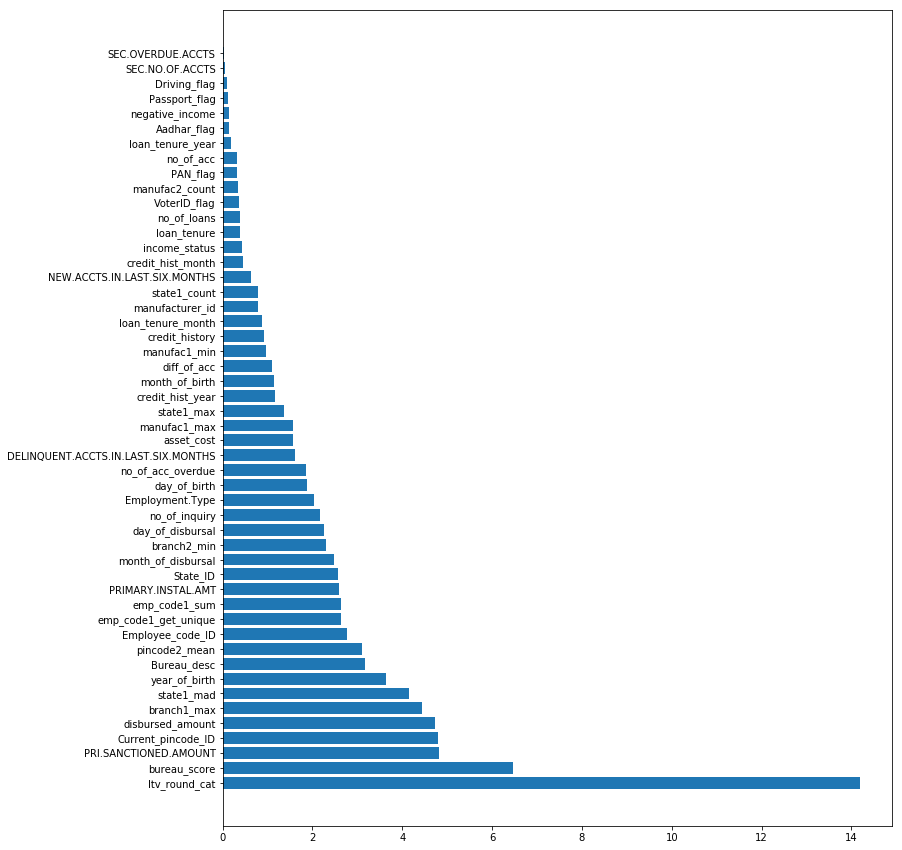

  adding: submission/catboost_tuesday_cat11.csv (deflated 54%)


In [20]:
run_cat_small('tuesday_cat11', train_df.drop(['UniqueID','ltv'], axis=1), 
              target, test_df.drop(['UniqueID','ltv'], axis=1), test_ids, sub, 4)
!zip submission/catboost_tuesday_cat11.zip submission/catboost_tuesday_cat11.csv

In [77]:
import glob
cat_inter_2way = glob.glob('store_data/new_feat/cat_inter_2way/*')
cat_inter_3way = glob.glob('store_data/new_feat/cat_inter_3way/*')
int_inter_2way = glob.glob('store_data/new_feat/int_inter_2way/*')
int_inter_3way = glob.glob('store_data/new_feat/int_inter_3way/*')

len(cat_inter_2way), len(cat_inter_3way), len(int_inter_2way), len(int_inter_3way)

(35, 595, 4, 17)

In [30]:
cat_2way0 = pd.read_csv(cat_inter_2way[1])

In [ ]:
total_feat = 0
for file in cat_inter_2way:
    feat = pd.read_csv(file).shape[1]
    print(feat)
    total_feat += feat
print("total cat interaction feature 2 way: ", total_feat)

In [34]:
total_feat = 0
for file in int_inter_2way:
    total_feat += pd.read_csv(file).shape[1]
print("total int interaction feature 2 way: ", total_feat)

total int interaction feature 2 way:  320


In [35]:
gc.collect()

1279

In [37]:
cat_2way0.shape, train_df.shape, test_df.shape

((336999, 2), (224607, 56), (112392, 56))

In [95]:
def reduce_mem_usage_wo_print(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    print("="*30)
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtypes
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                    # print(col, "== int8")
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                    # print(col, "== int16")
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                    # print(col, "== int32")
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                    # print(col, "== int64")
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                    # print(col, "== float16")
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                    # print(col, "== float32")
                else:
                    df[col] = df[col].astype(np.float64)
                    # print(col, "== float64")
        #else: df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print("="*30)
    return

In [ ]:
def run_cat_small(file_path, train_df, target, test_df, test_ids, sub, depth):
    
    splits = 4
    from sklearn.model_selection import KFold, StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from catboost import Pool, CatBoostClassifier

    features = train_df.columns
    random_seed = 2019
    
    model = CatBoostClassifier(loss_function         = "Logloss", 
                               eval_metric           = "AUC",
                               random_strength       = 1.5,
                               border_count          = 128,
                               scale_pos_weight      = 3.507,
                               depth                 = depth, 
                               early_stopping_rounds = 50,
                               random_seed           = 1337,
                               task_type             = 'CPU', 
    #                            subsample           = 0.7, 
                               iterations            = 10000, 
                               learning_rate         = 0.09,
                               thread_count          = 4
                              )


    n_split = splits
    
    valid_splits = int(train_df.shape[0]/splits)
    indexes = train_df[['cv_month','cv_date']].sort_values(
        by=['cv_month','cv_date'])
    
    train_index = indexes[:-valid_splits].index
    valid_index = indexes[-valid_splits:].index
    
    train_df.drop(['cv_month','cv_date'], axis=1, inplace=True)
    test_df.drop(['cv_month','cv_date'], axis=1, inplace=True)
    
    y_test_pred = 0

    idx = 0
    y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
    X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:]
    _train = Pool(X_train, label=y_train)#, cat_features=cate_features_index)
    _valid = Pool(X_valid, label=y_valid)#, cat_features=cate_features_index)

    fit_model = model.fit(_train, 
                          eval_set=_valid,
                          use_best_model=True,
                          verbose=100
                         )
    pred = fit_model.predict_proba(X_valid)[:,1]
    score = roc_auc_score(y_valid, pred)
    print( "  auc = ", score )
    print("="*60)

    y_test_pred = fit_model.predict_proba(test_df)[:,1]


    sub_df = pd.DataFrame({"ID_code":test_ids})
    sub_df["target"] = y_test_pred
    sub_df.columns = sub.columns


    sub_df.to_csv('submission/catboost_{}.csv'.format(file_path), index=None)

    cat_imp = pd.DataFrame(data=[fit_model.feature_names_, 
                                 list(fit_model.feature_importances_)]).T
    cat_imp.columns = ['feature','imp']
    cat_imp = cat_imp.sort_values(by='imp', ascending=False).head(50)
    plt.figure(figsize=(12,15))
    plt.barh(cat_imp.feature, cat_imp.imp)
    plt.show()
    
    return score

In [110]:
def run_rf(train_df, target, depth, estimators):
# def run_rf(file_path, train_df, target, test_df, test_ids, sub, depth, estimators):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import roc_auc_score
    from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


    features = train_df.columns

    splits = 4
    random_seed  = 2019
    n_splits     = splits
    verbose_eval = 200
    early_stop   = 50
    num_rounds   = 10000

    valid_splits = int(train_df.shape[0]/splits)
    indexes = train_df[['cv_month','cv_date']].sort_values(
        by=['cv_month','cv_date'])
    
    train_index = indexes[:-valid_splits].index
    valid_index = indexes[-valid_splits:].index
    
    train_df.drop(['cv_month','cv_date'], axis=1, inplace=True)
#     test_df.drop(['cv_month','cv_date'], axis=1, inplace=True)
    
    y_train, y_valid = target.iloc[train_index], target.iloc[valid_index]
    X_train, X_valid = train_df.iloc[train_index,:], train_df.iloc[valid_index,:] 

    clf = RandomForestClassifier(
                            n_estimators = estimators, 
                            criterion = 'gini', 
                            max_depth = depth, 
                            # min_samples_split = 2, 
                            min_samples_leaf = 3, 
                            # min_weight_fraction_leaf = 0.0, 
                            max_features = 0.5, 
                            # max_leaf_nodes = None, 
                            # min_impurity_decrease = 0.0, 
#                                 bootstrap = True, 
                            oob_score = True, 
                            n_jobs = 4, 
                            random_state = 1337, 
                            verbose = 1, 
                            class_weight = 'balanced')#3.607)
    clf.fit(X_train, y_train)
#         valid_pred = clf.predict(X_valid)
#         print("CV score: {:<8.5f}".format(roc_auc_score(X_valid, valid_pred)))
        
    valid_pred = clf.predict_proba(X_valid)[:,1]
    score = roc_auc_score(y_valid, valid_pred)
    print("CV score: {:<8.5f}".format(score))
#         test_pred = clf.predict()
#         oof_xgb[val_idx]   = valid_pred
    #     predictions   += test_pred


#     print("CV score: {:<8.5f}".format(roc_auc_score(target, oof_xgb)))

#     sub_df = pd.DataFrame({"id":test_ids})
#     sub_df["target"] = test_pred.mean(axis=1)
#     # sub_df.target = np.where(sub_df.target>0.5,1,0)

#     sub_df.columns = sub.columns
#     sub_df.to_csv('submission/xgboost_{}.csv'.format(file_path), index=None)

#     sub_df.head()

    feat_name = train_df.columns
    feat_imp  = clf.feature_importances_

    rf_imp = pd.DataFrame(data=[list(feat_name), list(feat_imp)]).T
    rf_imp.columns=['feature', 'importance']
    rf_imp = rf_imp.sort_values(by='importance', ascending=False).head(25)

    return score, clf, rf_imp

In [67]:
score_rf1, rf1, rf1_imp = run_rf('tuesday_rf1', 
                      train_df.drop(['UniqueID','ltv'], axis=1).fillna(0), 
                      target, test_df.drop(['UniqueID','ltv'], axis=1).fillna(0), 
                      test_ids, sub, 5, 200)
    
# !zip submission/catboost_tuesday_rf1.zip submission/catboost_tuesday_rf1.csv

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   31.1s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   32.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


CV score: 0.62183 


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.3s finished


In [69]:
train_df.shape, cat_2way0.shape

((224607, 56), (336999, 2))

In [128]:
score_rf1, rf1, rf1_imp = run_rf(train_df.drop(['UniqueID','ltv'], axis=1).fillna(0), 
                                 target, 6, 100)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   17.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62803 


In [114]:
rf_scores = []
rf_models  = []
rf_imps   = []

cat_inter_2way = glob.glob('store_data/new_feat/cat_inter_2way/*')
print("no of round on interaction: ", len(cat_inter_2way))


for file in cat_inter_2way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')
    reduce_mem_usage_wo_print(cat_feature)
    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    
#     cat_feature_tr = cat_feature.iloc[:train_df.shape[0],:]
#     cat_feature_ts = cat_feature.iloc[train_df.shape[0]:,:]
#     cat_feature_ts.reset_index(drop=True, inplace=True)
    
#     del cat_feature
#     gc.collect()
    
    tr_data = train_df.drop(['UniqueID','ltv_round_cat'], axis=1).fillna(0)
    tr_data = pd.concat([tr_data, cat_feature], axis=1)
    print(tr_data.shape)
#     ts_data = test_df.drop(['UniqueID','ltv'], axis=1).fillna(0)
    
    del cat_feature
    gc.collect()
    
    depth = 7
    estimators = 100
    rf_score_, rf_model_, rf_imp_ = run_rf(tr_data, target, depth, estimators)
    
    rf_scores.append(rf_score_)
    rf_models.append(rf_model_)
    rf_imps.append(rf_imp_)
    
    del tr_data
    gc.collect()

no of round on interaction:  9
store_data/new_feat/cat_inter_2way/cat_inter_2way_5.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 24.10 MB
Decreased by 86.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   54.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63154 
store_data/new_feat/cat_inter_2way/cat_inter_2way_0.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 29.25 MB
Decreased by 83.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   59.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63253 
store_data/new_feat/cat_inter_2way/cat_inter_2way_6.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 27.32 MB
Decreased by 84.8%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   59.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63275 
store_data/new_feat/cat_inter_2way/cat_inter_2way_7.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 29.89 MB
Decreased by 83.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63243 
store_data/new_feat/cat_inter_2way/cat_inter_2way_4.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 24.10 MB
Decreased by 86.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   19.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   44.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63163 
store_data/new_feat/cat_inter_2way/cat_inter_2way_2.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 23.78 MB
Decreased by 86.8%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   45.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63184 
store_data/new_feat/cat_inter_2way/cat_inter_2way_1.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 25.07 MB
Decreased by 86.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   21.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   49.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63163 
store_data/new_feat/cat_inter_2way/cat_inter_2way_8.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 23.78 MB
Decreased by 86.8%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   41.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63072 
store_data/new_feat/cat_inter_2way/cat_inter_2way_3.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 27.96 MB
Decreased by 84.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   52.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63141 


In [115]:
print("shape of list after cat_inter_2way: ",len(rf_scores))


shape of list after cat_inter_2way:  9


In [116]:
# rf_scores = []
# rf_models  = []
# rf_imps   = []

int_inter_2way = glob.glob('store_data/new_feat/int_inter_2way/*')
print("no of round on interaction: ", len(int_inter_2way))


for file in int_inter_2way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')
    reduce_mem_usage_wo_print(cat_feature)
    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    
#     cat_feature_tr = cat_feature.iloc[:train_df.shape[0],:]
#     cat_feature_ts = cat_feature.iloc[train_df.shape[0]:,:]
#     cat_feature_ts.reset_index(drop=True, inplace=True)
    
#     del cat_feature
#     gc.collect()
    
    tr_data = train_df.drop(['UniqueID','ltv_round_cat'], axis=1).fillna(0)
    tr_data = pd.concat([tr_data, cat_feature], axis=1)
    print(tr_data.shape)
#     ts_data = test_df.drop(['UniqueID','ltv'], axis=1).fillna(0)
    
    del cat_feature
    gc.collect()
    
#     0.63425
    depth = 7
    estimators = 100
    
    rf_score_, rf_model_, rf_imp_ = run_rf(tr_data, target, depth, estimators)
    
    rf_scores.append(rf_score_)
    rf_models.append(rf_model_)
    rf_imps.append(rf_imp_)
    
    del tr_data
    gc.collect()
    break

no of round on interaction:  4
store_data/new_feat/int_inter_2way/num_inter_2way_48.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 58.17 MB
Decreased by 71.7%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   31.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63348 


In [117]:
print("shape of list after num_inter_2way: ",len(rf_scores))


shape of list after num_inter_2way:  10


In [118]:
# rf_scores = []
# rf_models  = []
# rf_imps   = []

int_inter_3way = glob.glob('store_data/new_feat/int_inter_3way/*')
print("no of round on interaction: ", len(int_inter_3way))


for file in int_inter_3way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')
    reduce_mem_usage_wo_print(cat_feature)
    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    
#     cat_feature_tr = cat_feature.iloc[:train_df.shape[0],:]
#     cat_feature_ts = cat_feature.iloc[train_df.shape[0]:,:]
#     cat_feature_ts.reset_index(drop=True, inplace=True)
    
#     del cat_feature
#     gc.collect()
    
    tr_data = train_df.drop(['UniqueID','ltv_round_cat'], axis=1).fillna(0)
    tr_data = pd.concat([tr_data, cat_feature], axis=1)
    print(tr_data.shape)
#     ts_data = test_df.drop(['UniqueID','ltv'], axis=1).fillna(0)
    
    del cat_feature
    gc.collect()
    
    depth = 7
    estimators = 100
    rf_score_, rf_model_, rf_imp_ = run_rf(tr_data, target, depth, estimators)
    
    rf_scores.append(rf_score_)
    rf_models.append(rf_model_)
    rf_imps.append(rf_imp_)
    
    del tr_data
    gc.collect()

no of round on interaction:  17
store_data/new_feat/int_inter_3way/num_inter_3way_16.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 64.28 MB
Decreased by 68.7%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   29.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63170 
store_data/new_feat/int_inter_3way/num_inter_3way_112.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 66.85 MB
Decreased by 67.5%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   31.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63379 
store_data/new_feat/int_inter_3way/num_inter_3way_64.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 60.10 MB
Decreased by 70.8%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63356 
store_data/new_feat/int_inter_3way/num_inter_3way_144.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 77.13 MB
Decreased by 62.5%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   38.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63182 
store_data/new_feat/int_inter_3way/num_inter_3way_32.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 68.13 MB
Decreased by 66.9%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63305 
store_data/new_feat/int_inter_3way/num_inter_3way_208.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 66.21 MB
Decreased by 67.8%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63268 
store_data/new_feat/int_inter_3way/num_inter_3way_48.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 80.67 MB
Decreased by 60.8%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63385 
store_data/new_feat/int_inter_3way/num_inter_3way_240.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 75.53 MB
Decreased by 63.3%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   30.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


CV score: 0.63340 
store_data/new_feat/int_inter_3way/num_inter_3way_128.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 57.21 MB
Decreased by 72.2%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63284 
store_data/new_feat/int_inter_3way/num_inter_3way_176.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 63.63 MB
Decreased by 69.1%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63285 
store_data/new_feat/int_inter_3way/num_inter_3way_96.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 58.81 MB
Decreased by 71.4%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   54.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63346 
store_data/new_feat/int_inter_3way/num_inter_3way_192.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 73.28 MB
Decreased by 64.4%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   56.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63304 
store_data/new_feat/int_inter_3way/num_inter_3way_272.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 69.42 MB
Decreased by 66.2%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   54.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63373 
store_data/new_feat/int_inter_3way/num_inter_3way_160.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 75.85 MB
Decreased by 63.1%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   27.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63241 
store_data/new_feat/int_inter_3way/num_inter_3way_80.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 60.42 MB
Decreased by 70.6%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63209 
store_data/new_feat/int_inter_3way/num_inter_3way_224.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 64.28 MB
Decreased by 68.7%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   57.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63301 
store_data/new_feat/int_inter_3way/num_inter_3way_256.csv
Memory usage of dataframe is 205.69 MB
Memory usage after optimization is: 93.20 MB
Decreased by 54.7%
(224607, 134)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   55.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.63340 


In [119]:
print("shape of list after num_inter_3way: ",len(rf_scores))


shape of list after num_inter_3way:  27


In [129]:
gc.collect()

2179

In [120]:
# rf_scores = []
# rf_models  = []
# rf_imps   = []

cat_inter_3way = glob.glob('store_data/new_feat/cat_inter_3way_new/*')
print("no of round on interaction: ", len(cat_inter_3way))


for file in cat_inter_3way:
    print(file)
    cat_feature = pd.read_csv(file)
    cat_feature = cat_feature.astype('int')
    reduce_mem_usage_wo_print(cat_feature)
    
    cat_feature = cat_feature.iloc[:train_df.shape[0],:]
    
#     cat_feature_tr = cat_feature.iloc[:train_df.shape[0],:]
#     cat_feature_ts = cat_feature.iloc[train_df.shape[0]:,:]
#     cat_feature_ts.reset_index(drop=True, inplace=True)
    
#     del cat_feature
#     gc.collect()
    
    tr_data = train_df.drop(['UniqueID','ltv_round_cat'], axis=1).fillna(0)
    tr_data = pd.concat([tr_data, cat_feature], axis=1)
    print(tr_data.shape)
#     ts_data = test_df.drop(['UniqueID','ltv'], axis=1).fillna(0)
    
    del cat_feature
    gc.collect()
    
    depth = 6
    estimators = 100
    rf_score_, rf_model_, rf_imp_ = run_rf(tr_data, target, depth, estimators)
    
    rf_scores.append(rf_score_)
    rf_models.append(rf_model_)
    rf_imps.append(rf_imp_)
    
    del tr_data
    gc.collect()

no of round on interaction:  101
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_7.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.96 MB
Decreased by 79.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62797 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_38.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 30.53 MB
Decreased by 83.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62683 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_96.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 38.25 MB
Decreased by 78.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62809 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_67.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.10 MB
Decreased by 81.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62701 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_42.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 38.89 MB
Decreased by 78.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62694 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_39.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.92 MB
Decreased by 78.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   41.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62759 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_16.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 40.17 MB
Decreased by 77.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62793 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_46.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.60 MB
Decreased by 79.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   40.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62660 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_78.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 30.21 MB
Decreased by 83.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62714 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_21.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.32 MB
Decreased by 79.8%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62737 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_9.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 30.21 MB
Decreased by 83.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   34.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62696 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_82.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.46 MB
Decreased by 82.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62722 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_90.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.00 MB
Decreased by 80.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62790 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_18.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 42.42 MB
Decreased by 76.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   40.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62713 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_95.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 31.17 MB
Decreased by 82.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62715 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_60.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.71 MB
Decreased by 80.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62724 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_92.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.96 MB
Decreased by 79.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62668 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_80.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 38.89 MB
Decreased by 78.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   40.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62851 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_69.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 40.49 MB
Decreased by 77.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62658 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_66.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.14 MB
Decreased by 82.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62729 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_48.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.64 MB
Decreased by 79.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62709 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_41.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.92 MB
Decreased by 78.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62732 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_54.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.46 MB
Decreased by 82.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   34.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62706 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_71.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 28.28 MB
Decreased by 84.3%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   32.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62638 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_63.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 40.17 MB
Decreased by 77.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62767 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_51.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.39 MB
Decreased by 80.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62775 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_40.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.14 MB
Decreased by 82.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62749 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_26.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 30.85 MB
Decreased by 82.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   33.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62770 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_14.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.03 MB
Decreased by 80.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   40.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62665 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_75.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 39.21 MB
Decreased by 78.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   42.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62826 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_43.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 40.17 MB
Decreased by 77.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62606 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_15.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 42.42 MB
Decreased by 76.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   41.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62714 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_88.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 41.46 MB
Decreased by 77.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   33.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62789 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_98.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.03 MB
Decreased by 80.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62764 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_49.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.92 MB
Decreased by 78.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   41.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62703 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_6.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.39 MB
Decreased by 80.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62713 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_94.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.28 MB
Decreased by 79.3%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   41.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62761 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_100.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 31.50 MB
Decreased by 82.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62686 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_87.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 40.17 MB
Decreased by 77.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62724 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_27.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.14 MB
Decreased by 82.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62797 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_55.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.42 MB
Decreased by 81.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62777 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_28.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 28.60 MB
Decreased by 84.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62674 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_5.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.10 MB
Decreased by 81.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62647 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_2.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 38.25 MB
Decreased by 78.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62764 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_77.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 39.85 MB
Decreased by 77.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   40.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62819 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_0.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.10 MB
Decreased by 81.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62728 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_57.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.67 MB
Decreased by 80.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62707 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_3.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 38.57 MB
Decreased by 78.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62823 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_99.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.92 MB
Decreased by 78.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62625 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_97.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.75 MB
Decreased by 81.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62762 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_85.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.03 MB
Decreased by 80.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62757 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_22.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.03 MB
Decreased by 80.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62683 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_45.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.00 MB
Decreased by 80.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62777 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_34.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.42 MB
Decreased by 81.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62712 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_1.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.28 MB
Decreased by 79.3%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62665 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_86.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.78 MB
Decreased by 81.8%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62798 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_33.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 40.17 MB
Decreased by 77.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   40.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62690 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_91.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.39 MB
Decreased by 80.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62708 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_25.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.39 MB
Decreased by 80.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62649 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_65.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.07 MB
Decreased by 81.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62651 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_17.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.00 MB
Decreased by 80.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62691 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_64.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.75 MB
Decreased by 81.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62726 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_93.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.28 MB
Decreased by 79.3%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62766 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_4.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.67 MB
Decreased by 80.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62683 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_83.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.07 MB
Decreased by 81.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62572 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_47.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.14 MB
Decreased by 82.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62606 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_36.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.67 MB
Decreased by 80.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62755 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_10.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.96 MB
Decreased by 79.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62776 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_44.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 39.21 MB
Decreased by 78.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62728 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_37.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 41.46 MB
Decreased by 77.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   41.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62669 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_19.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.60 MB
Decreased by 79.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62750 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_12.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.03 MB
Decreased by 80.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62706 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_13.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.42 MB
Decreased by 81.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62856 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_58.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 28.28 MB
Decreased by 84.3%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   33.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62653 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_35.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 39.85 MB
Decreased by 77.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62736 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_24.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.75 MB
Decreased by 81.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62667 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_81.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.71 MB
Decreased by 80.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62624 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_76.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.96 MB
Decreased by 79.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62733 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_23.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.46 MB
Decreased by 82.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62704 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_62.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.92 MB
Decreased by 78.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62759 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_56.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.92 MB
Decreased by 78.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62782 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_89.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 38.89 MB
Decreased by 78.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62703 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_79.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 41.46 MB
Decreased by 77.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   43.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62779 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_84.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.07 MB
Decreased by 81.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   37.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62787 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_31.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 30.21 MB
Decreased by 83.2%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62633 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_72.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.71 MB
Decreased by 80.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62693 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_50.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 31.50 MB
Decreased by 82.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62747 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_70.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 35.03 MB
Decreased by 80.5%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62605 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_73.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.39 MB
Decreased by 80.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   34.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62684 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_11.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.00 MB
Decreased by 80.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62766 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_29.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 40.17 MB
Decreased by 77.7%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62739 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_74.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.32 MB
Decreased by 79.8%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62782 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_20.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.07 MB
Decreased by 81.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   38.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62650 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_30.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 32.46 MB
Decreased by 82.0%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   34.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62767 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_8.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 28.28 MB
Decreased by 84.3%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   34.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62731 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_59.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 36.64 MB
Decreased by 79.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62733 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_61.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.07 MB
Decreased by 81.1%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   36.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62800 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_32.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 38.57 MB
Decreased by 78.6%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   40.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62707 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_68.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 33.42 MB
Decreased by 81.4%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   41.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62811 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_52.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 37.92 MB
Decreased by 78.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   39.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


CV score: 0.62677 
store_data/new_feat/cat_inter_3way_new/cat_inter_3way_53.csv
Memory usage of dataframe is 179.98 MB
Memory usage after optimization is: 34.39 MB
Decreased by 80.9%
(224607, 124)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   35.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


CV score: 0.62778 


In [121]:
print("shape of list after cat_inter_3way: ",len(rf_scores))


shape of list after cat_inter_3way:  128


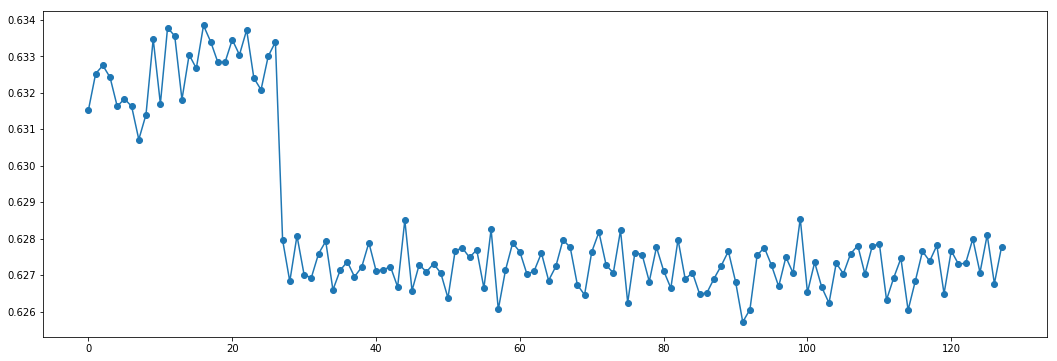

In [123]:
plt.figure(figsize=(18,6))
plt.plot(rf_scores,'-o')

In [182]:
# import re

# def split_it(x):
#     return re.findall('[:\+\-\*\/]', x)# 

# imp['position'] = np.arange(imp.shape[0])+1
# imp['position'] = imp.apply(lambda x: x[2] if split_it(x[0]) else 0, axis=1)
# imp['which_file'] = 1
# imp[imp.position != 0]

In [191]:
import re

def split_it(x):
    return re.findall('[:\+\-\*\/]', x)# 


save_feat = pd.DataFrame()
for ii,imp in enumerate(rf_imps):
    imp['position'] = np.arange(imp.shape[0])+1
    imp['position'] = imp.apply(lambda x: x[2] if split_it(x[0]) else 0, axis=1)
    imp['which_file'] = ii
    save_feat = pd.concat([save_feat, imp[imp.position != 0]], axis=0)
    
    if ii%10 == 0:
        print("reach here at ",ii)

reach here at  0


/home/ankish/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


reach here at  10
reach here at  20
reach here at  30
reach here at  40
reach here at  50
reach here at  60
reach here at  70
reach here at  80
reach here at  90
reach here at  100
reach here at  110
reach here at  120


In [197]:
del rf_models
gc.collect()

1479

In [199]:
save_feat.to_csv('store_data/interaction_feature_importance.csv', index=None)
np.save('store_data/intraction_feature_rf_scores.npy', rf_scores)